# 关键点检测数据集挖掘探索可视化

 2023-4-24

## 导入工具包

In [37]:
import os

import cv2
import numpy as np
import pandas as pd
import math

from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# 创建 图表 文件夹，用于存放图表
if not os.path.exists('图表'):
    os.mkdir('图表')
    print('创建空文件夹 图表')

## 设置matplotlib中文字体（如果中文显示为方框，重启kernel重新运行即可）

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [41]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

--2024-07-17 15:13:05--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在解析主机 zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
正在连接 zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 

200 OK
长度：10050868 (9.6M) [application/x-font-ttf]
正在保存至: “SimHei.ttf.1”

SimHei.ttf.1        100%[===================>]   9.58M  4.10MB/s  用时 2.3s      

2024-07-17 15:13:07 (4.10 MB/s) - 已保存 “SimHei.ttf.1” [10050868/10050868])



In [42]:
# Linux操作系统，例如 云GPU平台：https://www.runpod.io/
# 如果报错 Unable to establish SSL connection.，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf --no-check-certificate
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc("font",family='SimHei') # 中文字体
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/Users/es/miniconda3/envs/ultralytics/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/Users/es/miniconda3/envs/ultralytics/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) D

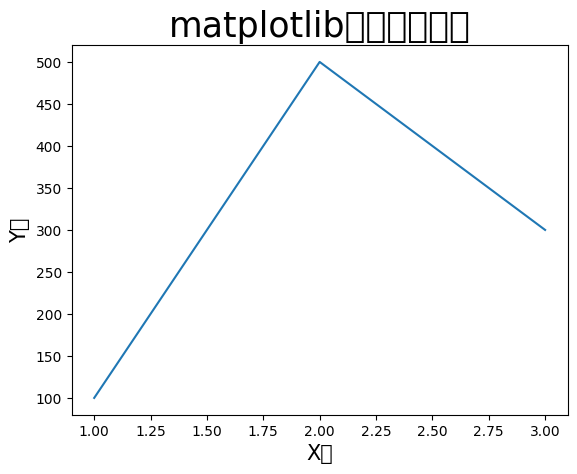

In [70]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 拍摄地点交互式地图可视化

 视频教程：https://www.bilibili.com/video/BV1m3411A786

注：这个功能适用于包含EXIF地理位置信息的图像文件（例如手机或单反相机拍摄的照片文件），不适用于网络爬取图片。

## 可视化一些图像

In [44]:
folder_path = 'Triangle_215_Keypoint_Labelme/images'

N = 16 # 可视化图像的个数

/var/folders/39/wllj512d2dv845j_wdx3vctc0000gn/T/ipykernel_68672/3989486768.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


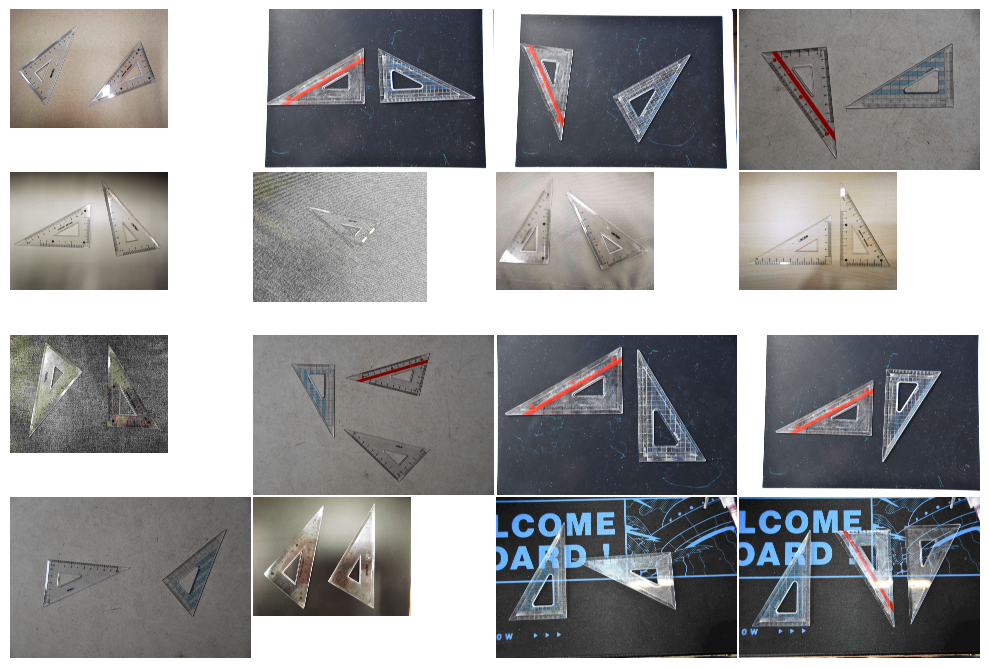

In [45]:
# n 行 n 列
n = math.floor(np.sqrt(N))

# 读取文件夹中的所有图像
images = []
for each_img in os.listdir(folder_path)[:N]:
    img_path = os.path.join(folder_path, each_img)
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    images.append(img_rgb)
    
# 画图
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # 类似绘制子图 subplot(111)
                 nrows_ncols=(n, n),  # 创建 n 行 m 列的 axes 网格
                 axes_pad=0.02,  # 网格间距
                 share_all=True
                 )

# 遍历每张图像
for ax, im in zip(grid, images):
    ax.imshow(im)
    ax.axis('off')

plt.tight_layout()

plt.savefig('图表/图像-一些图像.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 载入csv文件

In [46]:
df = pd.read_csv('kpt_dataset_eda.csv')

In [47]:
df

,imagePath,imageWidth,imageHeight,label_type,label,bbox_top_left_x,bbox_top_left_y,bbox_bottom_right_x,bbox_bottom_right_y,bbox_width_pix,...,bbox_height_norm,bbox_center_x_norm,bbox_center_y_norm,kpt_x_norm,kpt_x_pix,kpt_y_norm,kpt_y_pix,poly_area,poly_num_points,poly_points
0,IMG_20230417_173752.jpg,3648.0,2736.0,rectangle,sjb_rect,259.0,338.0,1426.0,2485.0,1167.0,...,0.784722,0.230948,0.515899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IMG_20230417_173752.jpg,3648.0,2736.0,rectangle,sjb_rect,1712.0,753.0,3532.0,1856.0,1820.0,...,0.403143,0.718750,0.476791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IMG_20230417_173752.jpg,3648.0,2736.0,point,angle_30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.078125,285.0,0.897661,2456.0,NaN,NaN,NaN
3,IMG_20230417_173752.jpg,3648.0,2736.0,point,angle_30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.964364,3518.0,0.284722,779.0,NaN,NaN,NaN
4,IMG_20230417_173752.jpg,3648.0,2736.0,point,angle_60,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.157895,576.0,0.130117,356.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,IMG_20230417_174145.jpg,3648.0,2736.0,point,angle_30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.255482,932.0,0.089181,244.0,NaN,NaN,NaN
1662,IMG_20230417_174145.jpg,3648.0,2736.0,point,angle_60,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.342654,1250.0,0.862208,2359.0,NaN,NaN,NaN
1663,IMG_20230417_174145.jpg,3648.0,2736.0,point,angle_60,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.424068,1547.0,0.640716,1753.0,NaN,NaN,NaN
1664,IMG_20230417_174145.jpg,3648.0,2736.0,point,angle_90,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.052357,191.0,0.721126,1973.0,NaN,NaN,NaN


## 图像总数

In [48]:
# 图像个数
len(df['imagePath'].unique())

215

## 图像尺寸分布

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

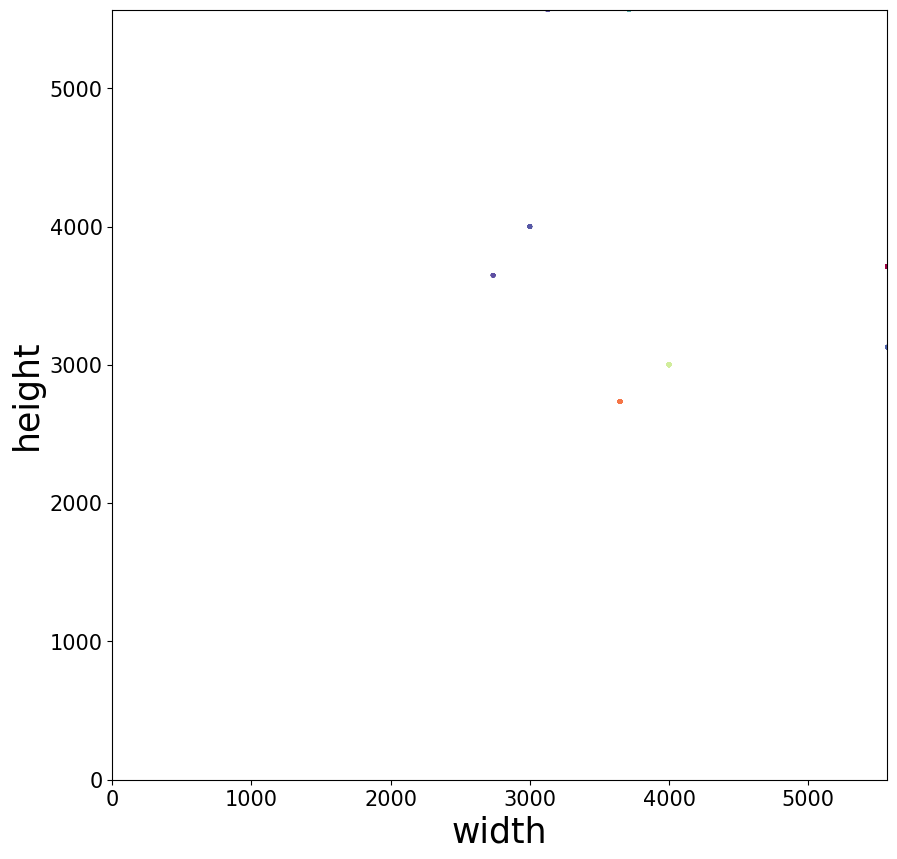

In [49]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

x = df['imageWidth']
y = df['imageHeight']

xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(10,10))
plt.scatter(x, y, c=z,  s=5, cmap='Spectral_r')
# plt.colorbar()
# plt.xticks([])
# plt.yticks([])

plt.tick_params(labelsize=15)

xy_max = max(max(df['imageWidth']), max(df['imageHeight']))
plt.xlim(xmin=0, xmax=xy_max)
plt.ylim(ymin=0, ymax=xy_max)

plt.ylabel('height', fontsize=25)
plt.xlabel('width', fontsize=25)

plt.savefig('图表/图像-图像宽高尺寸分布.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 不同标注种类的个数

In [50]:
df_num = pd.DataFrame()
label_type_list = []
num_list = []
for each in df['label_type'].unique():
    label_type_list.append(each)
    num_list.append(len(df[df['label_type']==each]))
    
df_num['label_type'] = label_type_list
df_num['num'] = num_list

df_num = df_num.sort_values(by='num', ascending=False)

In [51]:
df_num

,label_type,num
1,point,1232
0,rectangle,413
2,polygon,21


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/var/folders/39/wllj512d2dv845j_wdx3vctc0000gn/T/ipykernel_68672/3433212292.py:13: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  plt.savefig('图表/图像-各标注种类个数.pdf', dpi=120, bbox_inches='tight')
/var/folders/39/wllj512d2dv845j_wdx3vctc0000gn/T/ipykernel_68672/3433212292.py:13: UserWarning: Glyph 27880 (\N{CJK UNIFIED IDEOGRAPH-6CE8}) missing from font(s) DejaVu Sans.
  plt.savefig('图表/图像-各标注种类个数.pdf', dpi=120, bbox_inches='tight')
/var/folders/39/wllj512d2dv845j_wdx3vctc0000gn/T/ipykernel_68672/3433212292.py:13: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.savefig('图表/图像-各标注种类个数.pdf', dpi=120, bbox_inches='tight')
/var/folders/39/wllj512d2dv8

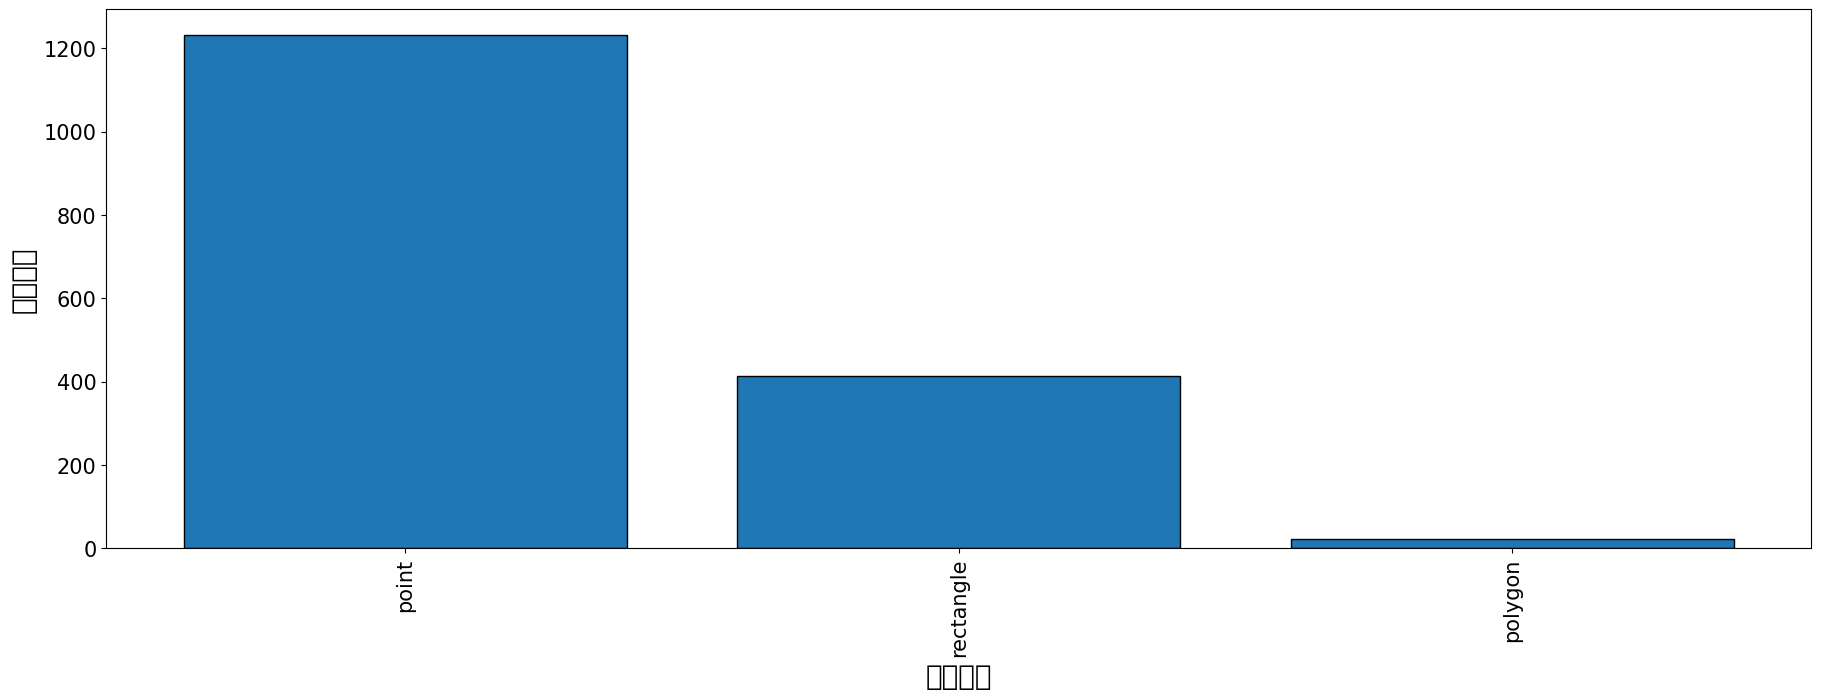

In [52]:
plt.figure(figsize=(22, 7))

x = df_num['label_type']
y = df_num['num']

plt.bar(x, y, facecolor='#1f77b4', edgecolor='k')

plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.xlabel('标注类别', fontsize=20)
plt.ylabel('图像数量', fontsize=20)

plt.savefig('图表/图像-各标注种类个数.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 不同图像的标注个数

In [53]:
df_num = pd.DataFrame()
label_type_list = []
num_list = []
for each in df['imagePath'].unique():
    label_type_list.append(each)
    num_list.append(len(df[df['imagePath']==each]))
    
df_num['label_type'] = label_type_list
df_num['num'] = num_list

df_num = df_num.sort_values(by='num', ascending=False)

In [54]:
df_num

,label_type,num
89,DSC_0280.jpg,16
152,DSC_0373.jpg,15
56,DSC_0370.jpg,15
110,DSC_0372.jpg,15
97,DSC_0371.jpg,15
...,...,...
90,MVIMG_20230331_082447.jpg,4
179,MVIMG_20230331_082419.jpg,4
119,DSC_0240.jpg,4
159,MVIMG_20230331_082301.jpg,4


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

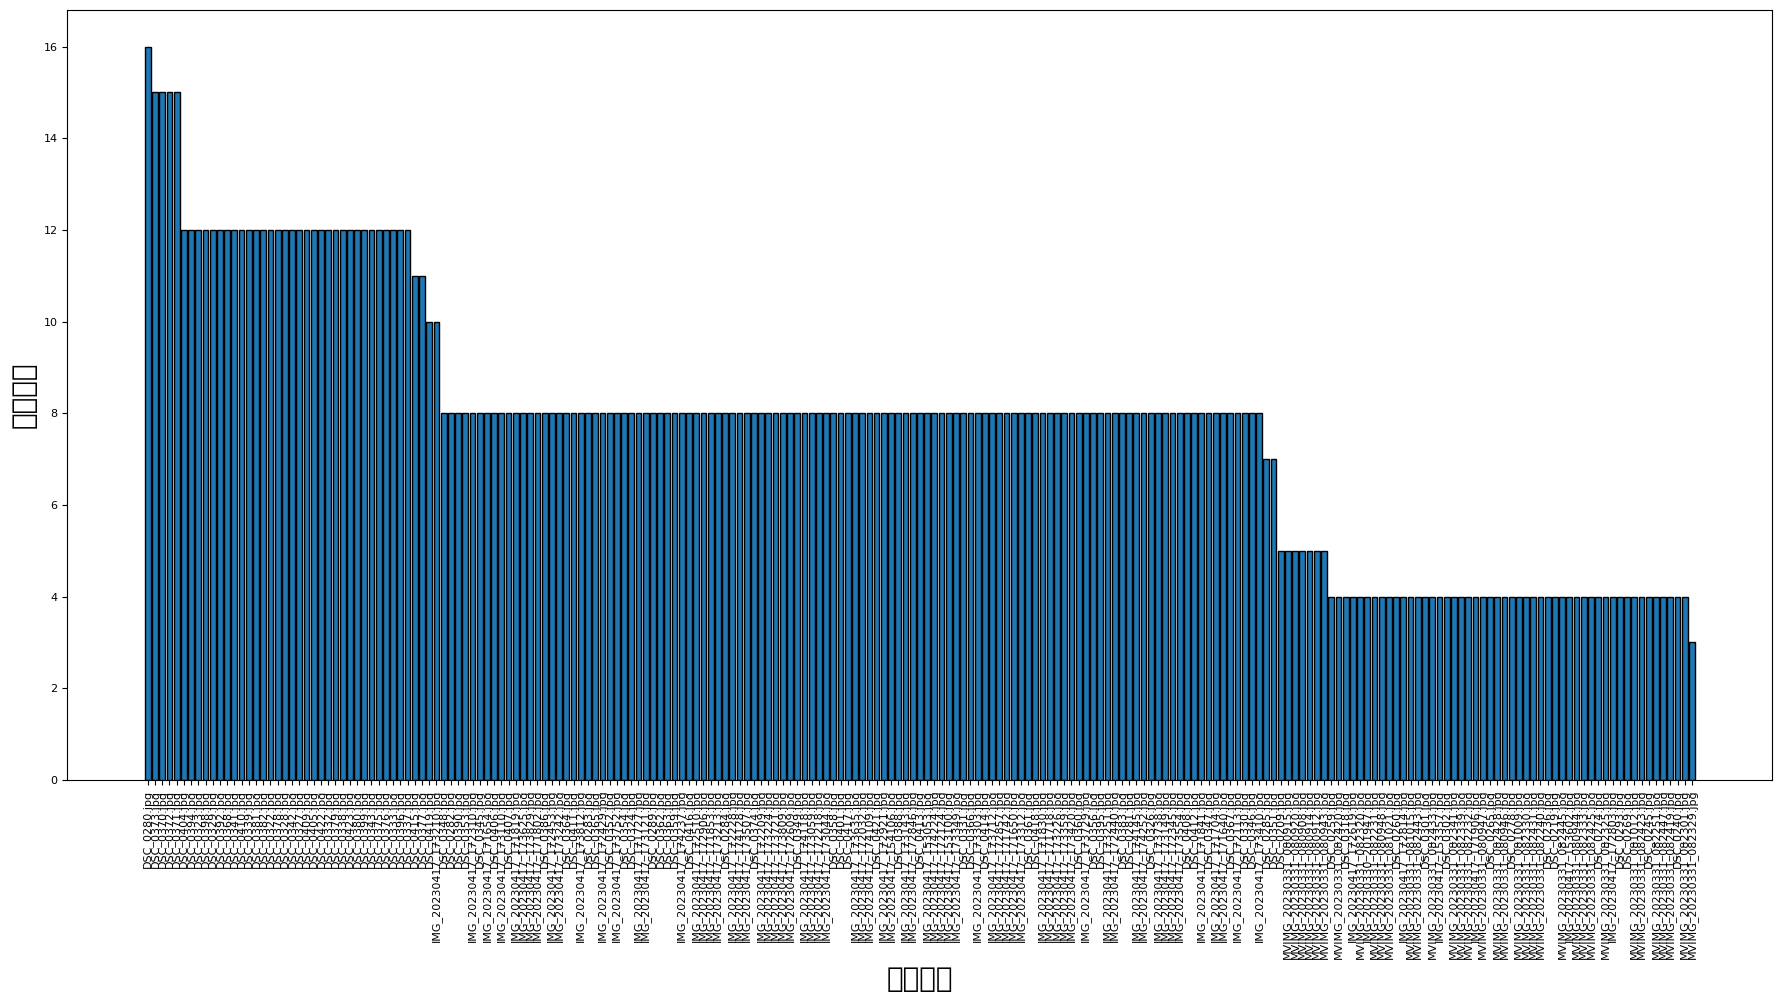

In [55]:
plt.figure(figsize=(22, 10))

x = df_num['label_type']
y = df_num['num']

plt.bar(x, y, facecolor='#1f77b4', edgecolor='k')

plt.xticks(rotation=90)
plt.tick_params(labelsize=8)
plt.xlabel('图像路径', fontsize=20)
plt.ylabel('标注个数', fontsize=20)

plt.savefig('图表/图像-不同图像的标注个数.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 框标注-框中心点位置分布

In [56]:
df_box = df[df['label_type']=='rectangle']
df_box = df_box.reset_index(drop=True)

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

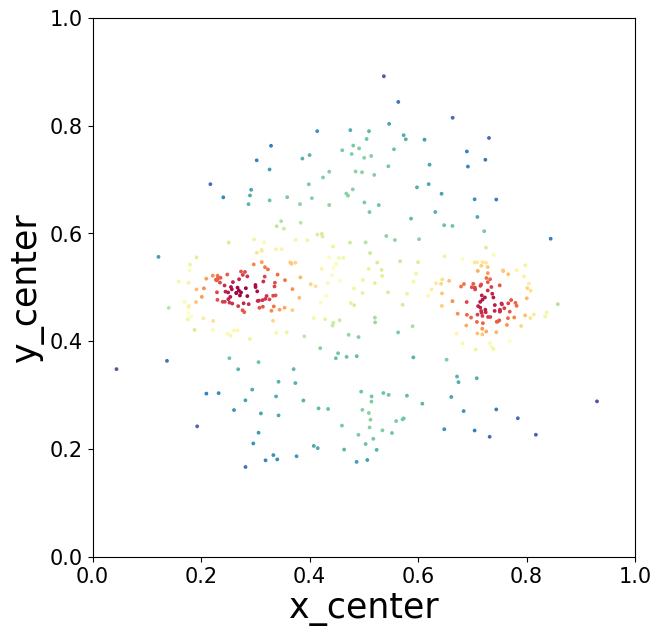

In [57]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

x = df_box['bbox_center_x_norm']
y = df_box['bbox_center_y_norm']

xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(7,7))
plt.scatter(x, y,c=z,  s=3,cmap='Spectral_r')
# plt.colorbar()
# plt.xticks([])
# plt.yticks([])
plt.tick_params(labelsize=15)
plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel('x_center', fontsize=25)
plt.ylabel('y_center', fontsize=25)

plt.savefig('图表/框标注-框中心点位置分布.pdf', dpi=120, bbox_inches='tight')

plt.show()

In [58]:
# 样例图表

## 框标注-框宽高分布

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

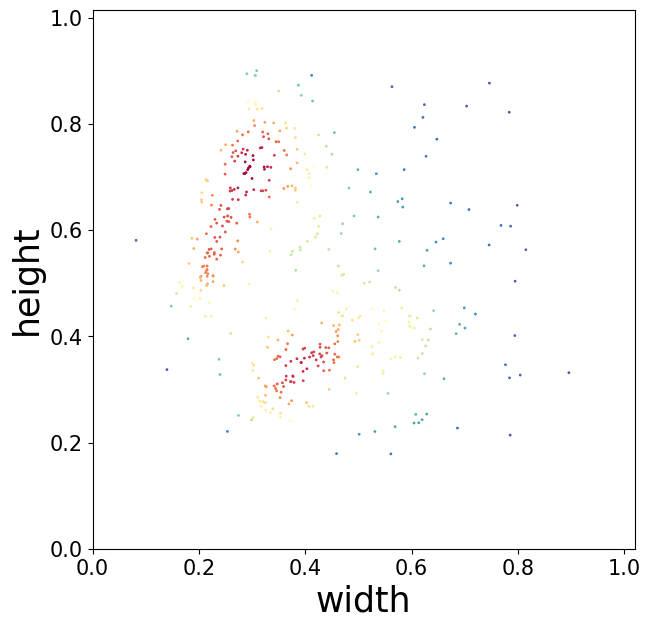

In [59]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

x = df_box['bbox_width_norm']
y = df_box['bbox_height_norm']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(7,7))
# plt.figure(figsize=(12,12))
plt.scatter(x, y,c=z,  s=1,cmap='Spectral_r')
# plt.colorbar()
# plt.xticks([])
# plt.yticks([])

plt.tick_params(labelsize=15)
plt.xlim(0,1.02)
plt.ylim(0,1.015)

plt.xlabel('width', fontsize=25)
plt.ylabel('height', fontsize=25)

plt.savefig('图表/框标注-框宽高分布.pdf', dpi=120, bbox_inches='tight')

plt.show()

In [60]:
# 样例图表
# 来源：同济大学硕士毕业论文 钢轨表面伤损细粒度图像分类与检测系统 

## 关键点标注-不同类别的标注个数

In [61]:
# 二选一运行
df_point = df[df['label_type']=='point']    # 所有关键点
# df_point = df[df['label']=='angle_30']      # 指定一类关键点

In [62]:
df_point = df_point.reset_index(drop=True)

In [63]:
df_num = pd.DataFrame()
label_type_list = []
num_list = []
for each in df_point['label'].unique():
    label_type_list.append(each)
    num_list.append(len(df_point['label']==each))
    
df_num['label_type'] = label_type_list
df_num['num'] = num_list

df_num = df_num.sort_values(by='num', ascending=False)

In [64]:
df_num

,label_type,num
0,angle_30,1232
1,angle_60,1232
2,angle_90,1232


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/var/folders/39/wllj512d2dv845j_wdx3vctc0000gn/T/ipykernel_68672/1599264362.py:13: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  plt.savefig('图表/关键点标注-不同类别点的标注个数.pdf', dpi=120, bbox_inches='tight')
/var/folders/39/wllj512d2dv845j_wdx3vctc0000gn/T/ipykernel_68672/1599264362.py:13: UserWarning: Glyph 27880 (\N{CJK UNIFIED IDEOGRAPH-6CE8}) missing from font(s) DejaVu Sans.
  plt.savefig('图表/关键点标注-不同类别点的标注个数.pdf', dpi=120, bbox_inches='tight')
/var/folders/39/wllj512d2dv845j_wdx3vctc0000gn/T/ipykernel_68672/1599264362.py:13: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.savefig('图表/关键点标注-不同类别点的标注个数.pdf', dpi=120, bbox_inches='tight')
/var/folde

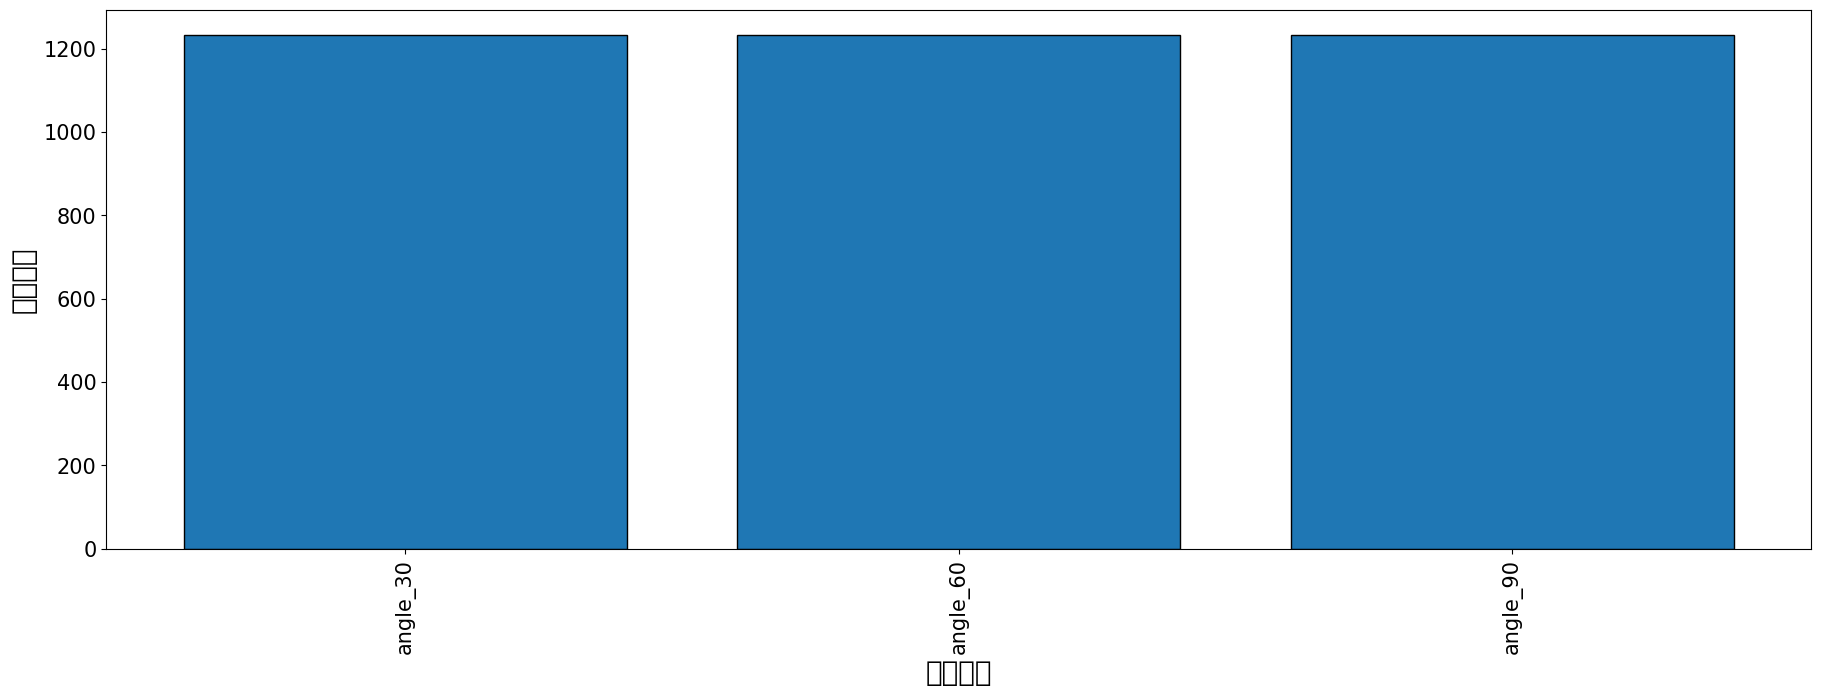

In [65]:
plt.figure(figsize=(22, 7))

x = df_num['label_type']
y = df_num['num']

plt.bar(x, y, facecolor='#1f77b4', edgecolor='k')

plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.xlabel('标注类别', fontsize=20)
plt.ylabel('图像数量', fontsize=20)

plt.savefig('图表/关键点标注-不同类别点的标注个数.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 关键点标注-点的位置分布

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

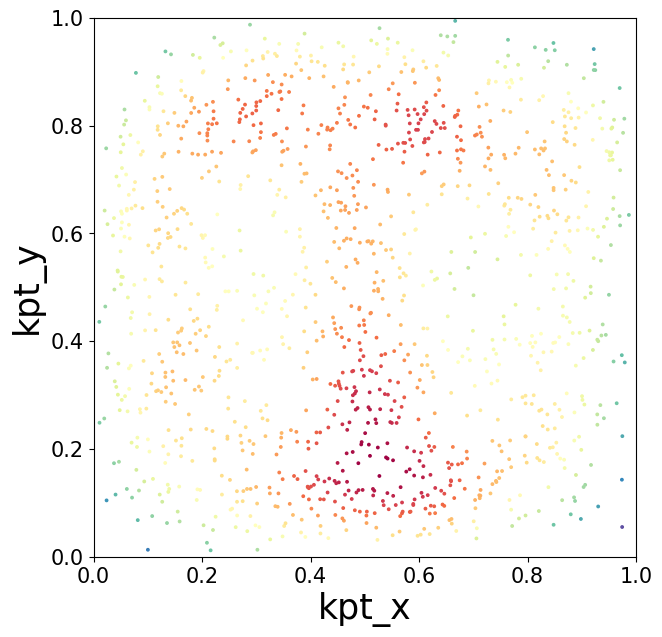

In [66]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

# 所有关键点
x = df_point['kpt_x_norm']
y = df_point['kpt_y_norm']

xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(7,7))
plt.scatter(x, y,c=z,  s=3,cmap='Spectral_r')
# plt.colorbar()
# plt.xticks([])
# plt.yticks([])
plt.tick_params(labelsize=15)
plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel('kpt_x', fontsize=25)
plt.ylabel('kpt_y', fontsize=25)

plt.savefig('图表/关键点标注-关键点位置分布.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 多段线标注-点的个数直方图

In [67]:
df_poly = df[df['label_type']=='polygon']
df_poly = df_poly.reset_index(drop=True)

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

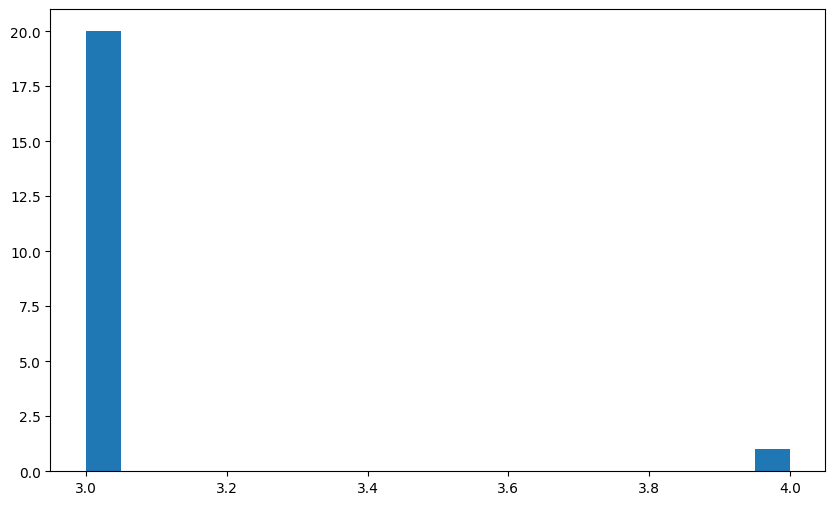

In [68]:
plt.figure(figsize=(10, 6))
plt.hist(df_poly['poly_num_points'], bins=20)
plt.savefig('图表/多段线标注-多段线点个数直方图.pdf', dpi=120, bbox_inches='tight')
plt.show()

## 多段线标注-区域面积直方图

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

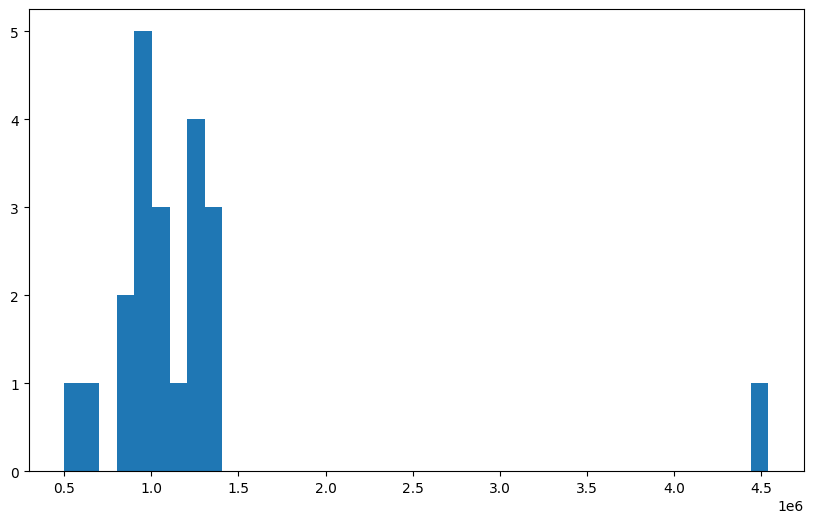

In [69]:
plt.figure(figsize=(10, 6))
plt.hist(df_poly['poly_area'], bins=40)
plt.savefig('图表/多段线标注-多段线区域面积直方图.pdf', dpi=120, bbox_inches='tight')
plt.show()